In [1]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
from collections import defaultdict


## Planar Enforcement Violation: Overlapping and non-plannar enforced edges

In [2]:
from shapely.geometry import Polygon

In [3]:
t1 = Polygon([[0,0],[10,10], [20,0]])

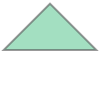

In [4]:
t1

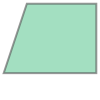

In [5]:
b1 = Polygon([[5,5], [20,5], [20,-10], [0,-10]])
b1

In [6]:
gdf = geopandas.GeoDataFrame(geometry=[t1,b1])

<AxesSubplot:>

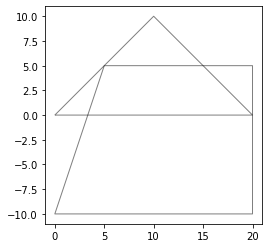

In [7]:
gdf.plot(edgecolor='k',facecolor="none",alpha=0.5) # non planar enforcement

The two features overlap and would appear to share vertices, but they in fact do not share vertices. This results in two polygons not being Queen neighbors:

In [8]:
import libpysal

w = libpysal.weights.Queen.from_dataframe(gdf)

/home/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)


## Detecting nonplanar edges

`geoplanar` will use a failed contiguity check as part of a check for nonplanar enforced edges in the polygons of a geoseries:

In [14]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {})

## Correcting nonplanar edges

In [10]:
gdf_fixed = geoplanar.fix_npe_edges(gdf)
geoplanar.non_planar_edges(gdf_fixed)

defaultdict(set, {})

## Default is to work on a copy

In [11]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {0: {1}})

In [12]:
gdf_fixed = geoplanar.fix_npe_edges(gdf, inplace=True) 


In [13]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {})